# Data transformation and balancing tests

Modified from data_prep_t03_...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd. read_csv('train_wells_20210131.csv')

In [ ]:
data.head()

,Depth,DTSM,DTCO,GAMMA,RHO
0,5400.5,97.2199,51.7345,38.9797,2.7323
1,5401.0,95.9859,50.8980,37.7184,2.7173
2,5401.5,94.7922,50.2660,35.5535,2.7252
3,5402.0,94.1404,50.0845,33.5090,2.7370
4,5402.5,92.9669,49.9931,32.5489,2.7487


In [ ]:
data=data[(data.DTCO<140) & (data.DTSM<240)]

In [ ]:
data.describe()

,Depth,DTSM,DTCO,GAMMA,RHO
count,230646.000000,230646.000000,230646.000000,230646.000000,230646.000000
mean,8361.304629,124.993044,68.296105,76.958087,2.577202
std,3930.443729,32.783624,15.159275,44.882927,0.178993
min,558.000000,40.615300,40.089000,0.731000,1.223200
25%,5433.500000,99.777150,55.584225,38.719075,2.497500
50%,8141.000000,115.728900,66.233300,78.519150,2.612000
75%,11445.000000,142.345275,78.840350,108.671350,2.679600
max,18740.000000,239.998200,139.773000,623.161700,3.105200


## Remove some outliers


In [ ]:
xx=np.arange(40,140,1)
yy1=xx*1.0 +25
yy2=xx*2.5 +10
yy3=xx*4 - 250

df1=data[(data.DTSM > data.DTCO *1.0+25) & (data.DTSM > data.DTCO*4.0-250) & (data.DTSM < data.DTCO*2.5+10)]

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

ax1.hist2d(data.DTCO,data.DTSM, bins=100,cmap='jet')
ax1.scatter(xx,yy1,s=1,color='white')
ax1.scatter(xx,yy2,s=1,color='white')
ax1.scatter(xx,yy3,s=1,color='white')

ax2.hist2d(df1.DTCO,df1.DTSM, bins=100,cmap='jet')
ax2.scatter(xx,yy1,s=1,color='white')
ax2.scatter(xx,yy2,s=1,color='white')
ax2.scatter(xx,yy3,s=1,color='white')
#plt.savefig("histogram_2d_04.png", bbox_inches='tight')

ax3.scatter(df1.DTCO, df1.DTSM, s=1)
ax3.scatter(xx,yy1,s=1,color='red')
ax3.scatter(xx,yy2,s=1,color='red')
ax3.scatter(xx,yy3,s=1,color='red')

ax1.set_xlabel('DTCO')
ax1.set_ylabel('DTSM')

ax1.set_ylim([40,240])
ax2.set_ylim([40,240])
ax3.set_ylim([40,240])

In [ ]:
df1.to_csv('train_wells_20210131_cln.csv', index=False)

In [ ]:
cols=['Depth','GAMMA','RHO','DTCO']
X = df1[cols]
Y = df1[['DTSM']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(202409, 4) (202409, 1)
(22490, 4) (22490, 1)


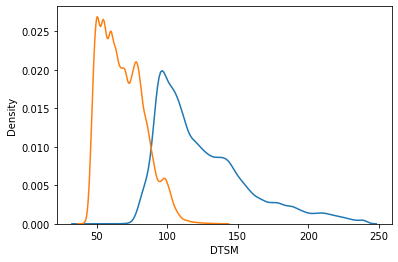

In [ ]:
sns.kdeplot(data.DTSM, label = "Train DTSM")
sns.kdeplot(data.DTCO, label = "Train DTCO")

##  DTCO vs Log DTSM


In [ ]:
train_DTCO_log = np.log(X_train.DTCO)
train_DTSM_log = np.log(Y_train.DTSM)

In [ ]:
x1=X_train.DTCO
x2=train_DTCO_log
y1=Y_train.DTSM
y2=train_DTSM_log

Text(0, 0.5, 'Log DTSM')

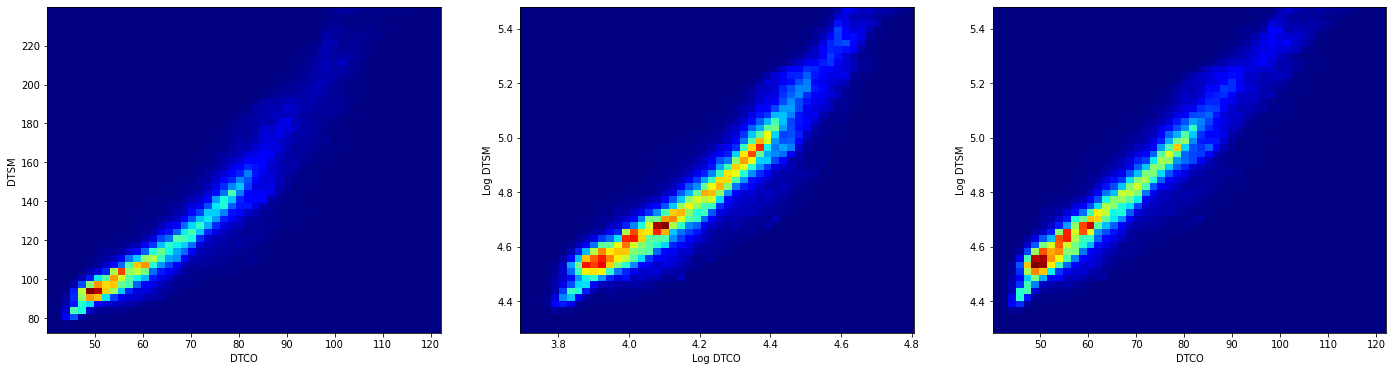

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

ax1.hist2d(x1,y1,bins=50, cmap='jet')
ax2.hist2d(x2,y2,bins=50, cmap='jet')
ax3.hist2d(x1,y2,bins=50, cmap='jet')
#plt.savefig("histogram_2d_04.png", bbox_inches='tight')

ax1.set_xlabel('DTCO')
ax1.set_ylabel('DTSM')
ax2.set_xlabel('Log DTCO')
ax2.set_ylabel('Log DTSM')
ax3.set_xlabel('DTCO')
ax3.set_ylabel('Log DTSM')

Text(0.5, 0, 'Log DTSM')

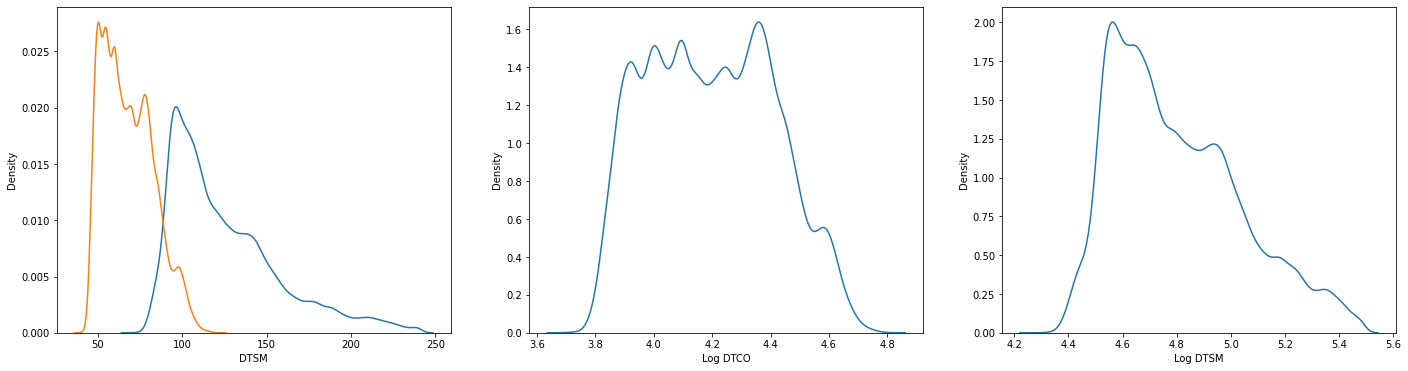

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

sns.kdeplot(Y_train.DTSM, label = "Train DTCO", ax=ax1)
sns.kdeplot(X_train.DTCO, label = "Train DTSM", ax=ax1)
sns.kdeplot(train_DTCO_log, label = "Train DTSM log", ax=ax2)
sns.kdeplot(train_DTSM_log, label = "Train DTSM log", ax=ax3)

ax2.set_xlabel('Log DTCO')
ax3.set_xlabel('Log DTSM')


##  Box-Cox transform (without data balancing)

In [ ]:
from scipy import stats

In [ ]:
fitted_train_DTCO, lambda_DTCO = stats.boxcox(X_train.DTCO)
fitted_train_DTSM, lambda_DTSM = stats.boxcox(Y_train.DTSM)  

In [ ]:
print(lambda_DTCO,lambda_DTSM)

-0.36763543363385337 -1.3302762378782893


Text(0.5, 0, 'Fitted DTSM')

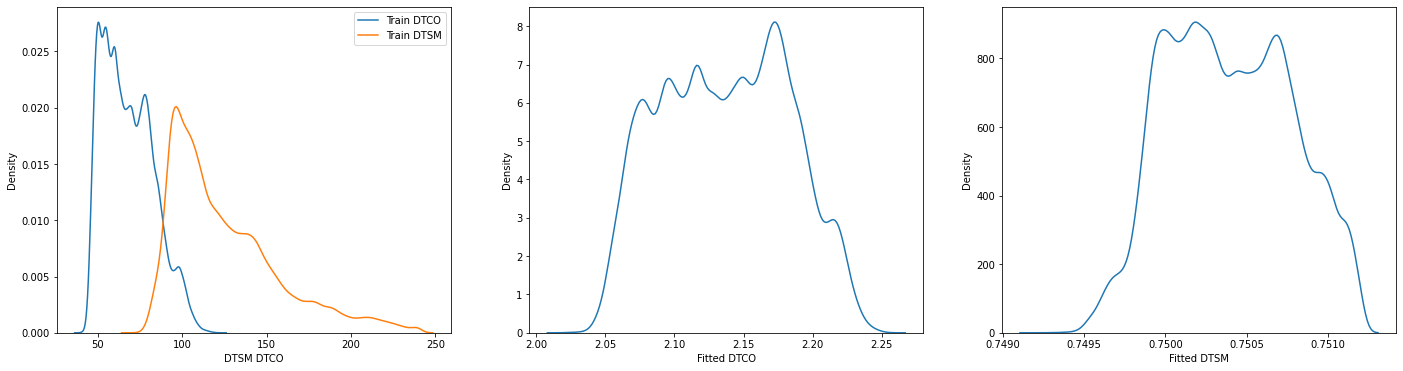

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
sns.kdeplot(X_train.DTCO, label = "Train DTCO", ax=ax1)
sns.kdeplot(Y_train.DTSM, label = "Train DTSM", ax=ax1)
ax1.set_xlabel('DTSM DTCO')
ax1.legend()
sns.kdeplot(fitted_train_DTCO, label = "Fitted Train DTCO", ax=ax2)
ax2.set_xlabel('Fitted DTCO')
sns.kdeplot(fitted_train_DTSM, label = "Fitted Train DTSM", ax=ax3)
ax3.set_xlabel('Fitted DTSM')

In [ ]:
x1=X_train.DTCO
x2=fitted_train_DTCO
y2=fitted_train_DTSM


Text(0, 0.5, 'Fitted DTSM')

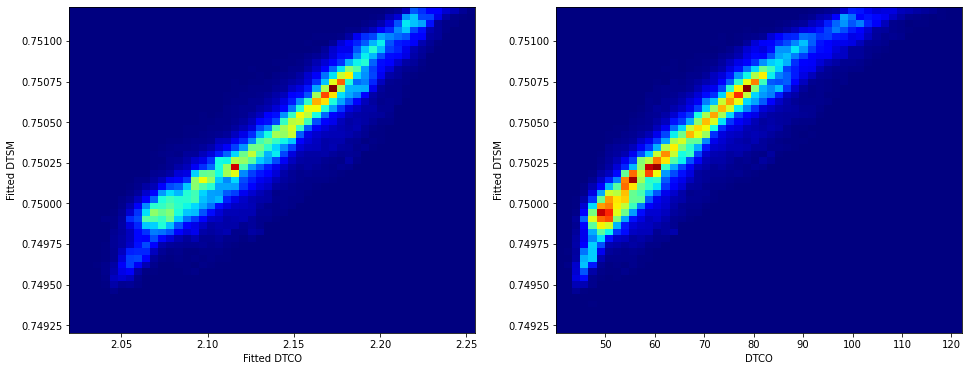

In [ ]:
f,(ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.hist2d(x2,y2,bins=50, cmap='jet')
ax2.hist2d(x1,y2,bins=50, cmap='jet')
#plt.savefig("histogram_2d_04.png", bbox_inches='tight')

ax1.set_xlabel('Fitted DTCO')
ax1.set_ylabel('Fitted DTSM')
ax2.set_xlabel('DTCO')
ax2.set_ylabel('Fitted DTSM')



## Data balancing


### SMOGN test
Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise

https://github.com/nickkunz/smogn

In [ ]:
pip install smogn

In [ ]:
import smogn

In [ ]:
smogn_test = df1[['DTCO','DTSM']].sample(n=2000,  random_state=0).reset_index(drop=True)


In [ ]:
balanced = smogn.smoter(
    
    ## main arguments
    data = smogn_test,           ## pandas dataframe
    y = 'DTCO',          ## string ('header name')
    k = 5,                    ## positive integer (k < n)
    samp_method = 'balance',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.5,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'both',   ## string ('low' or 'both' or 'high')
    rel_coef = 1      ## positive real number (0 < R)
)

r_index: 100%|##########| 19/19 [00:00<00:00, 577.57it/s]


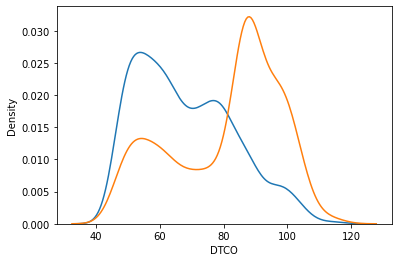

In [ ]:
sns.kdeplot(smogn_test.DTCO, label = "Data DTCO")
sns.kdeplot(balanced.DTCO, label = "Balanced DTCO")

### Balance data manually

In [ ]:
df2=pd.concat([df1[df1['DTCO']<=60].sample(frac=0.5),df1[(df1['DTCO']>60)&(df1['DTCO']<=85)].sample(frac=0.7), df1[df1['DTCO']>85]])
df2.reset_index(drop=True, inplace=True)

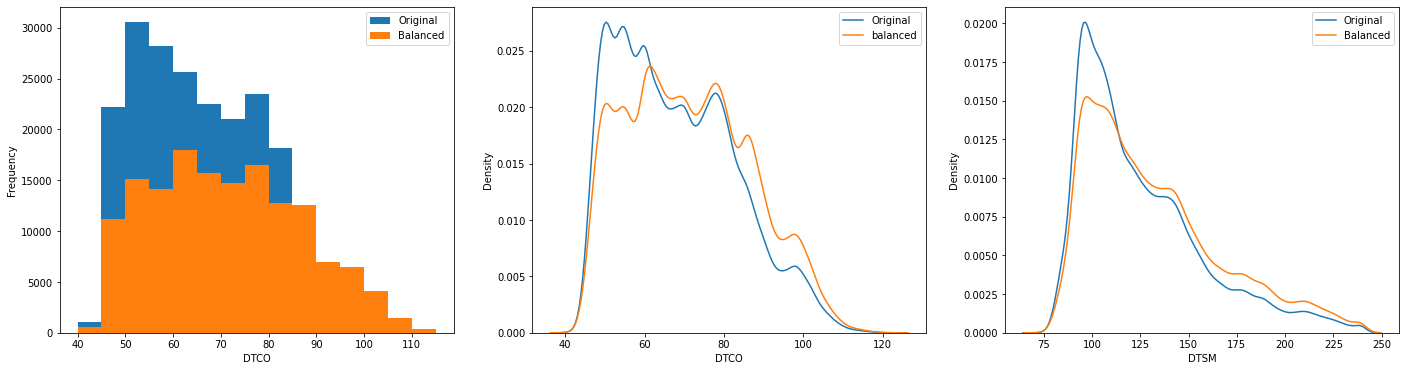

In [ ]:
f, (ax1,ax2,ax3)=plt.subplots(1,3, figsize=(24,6))
ax1.hist(df1.DTCO, bins=range(40,120,5),label = "Original")
ax1.hist(df2.DTCO, bins=range(40,120,5),label = "Balanced")
ax1.set_xlabel('DTCO')
ax1.set_ylabel('Frequency')
ax1.legend()
sns.kdeplot(df1.DTCO, label = "Original", ax=ax2)
sns.kdeplot(df2.DTCO, label = "balanced", ax=ax2)
ax2.legend()
sns.kdeplot(df1.DTSM, label = "Original", ax=ax3)
sns.kdeplot(df2.DTSM, label = "Balanced", ax=ax3)
ax3.legend()

In [ ]:
df2.to_csv('train_wells_20210131_cln_bal.csv', index=False)

## Box-Cox transform of balanced data

In [ ]:
fitted_df2_DTCO, lambda_df2_DTCO = stats.boxcox(df2.DTCO)
fitted_df1_DTCO, lambda_df1_DTCO = stats.boxcox(df1.DTCO)
fitted_df1_DTSM, lambda_df1_DTSM = stats.boxcox(df1.DTSM)
fitted_df2_DTSM, lambda_df2_DTSM = stats.boxcox(df2.DTSM)
print(lambda_df1_DTCO)
print(lambda_df2_DTCO)
print(lambda_df1_DTSM)
print(lambda_df2_DTSM)

-0.36563588342369313
0.13779097541226484
-1.3269819421330098
-0.9235008008429239


Text(0.5, 0, 'Fitted DTSM')

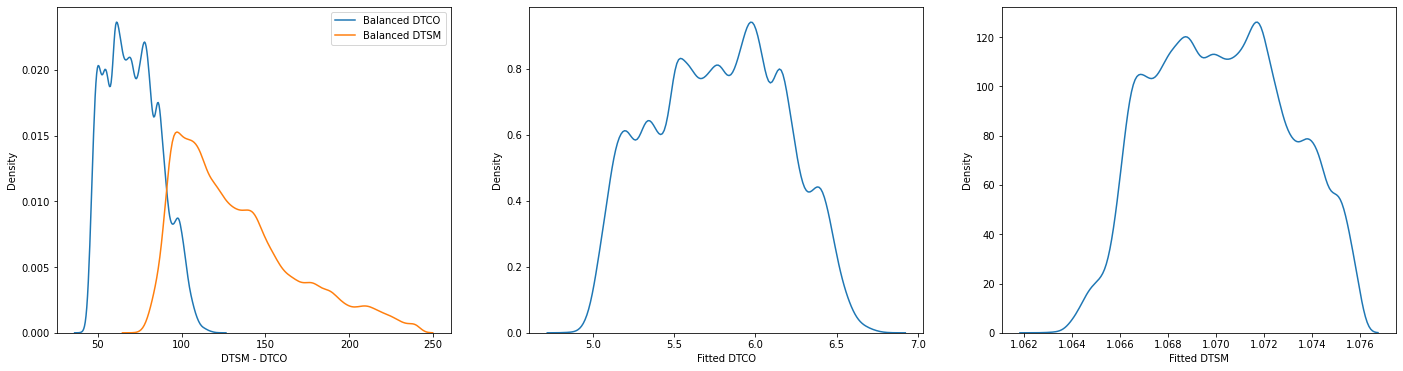

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
sns.kdeplot(df2.DTCO, label = "Balanced DTCO", ax=ax1)
sns.kdeplot(df2.DTSM, label = "Balanced DTSM", ax=ax1)
ax1.set_xlabel('DTSM - DTCO')
ax1.legend()
sns.kdeplot(fitted_df2_DTCO, label = "Fitted DTCO", ax=ax2)
ax2.set_xlabel('Fitted DTCO')
sns.kdeplot(fitted_df2_DTSM, label = "Fitted DTSM", ax=ax3)
ax3.set_xlabel('Fitted DTSM')

In [ ]:
x1=X_train.DTCO
x2=fitted_train_DTCO
y2=fitted_train_DTSM
y3 = np.log(Y_train.DTSM)

xb1=df2.DTCO
xb2=fitted_df2_DTCO
yb2=fitted_df2_DTSM
yb3 = np.log(df2.DTSM)

Text(0, 0.5, 'Log balanced DTSM')

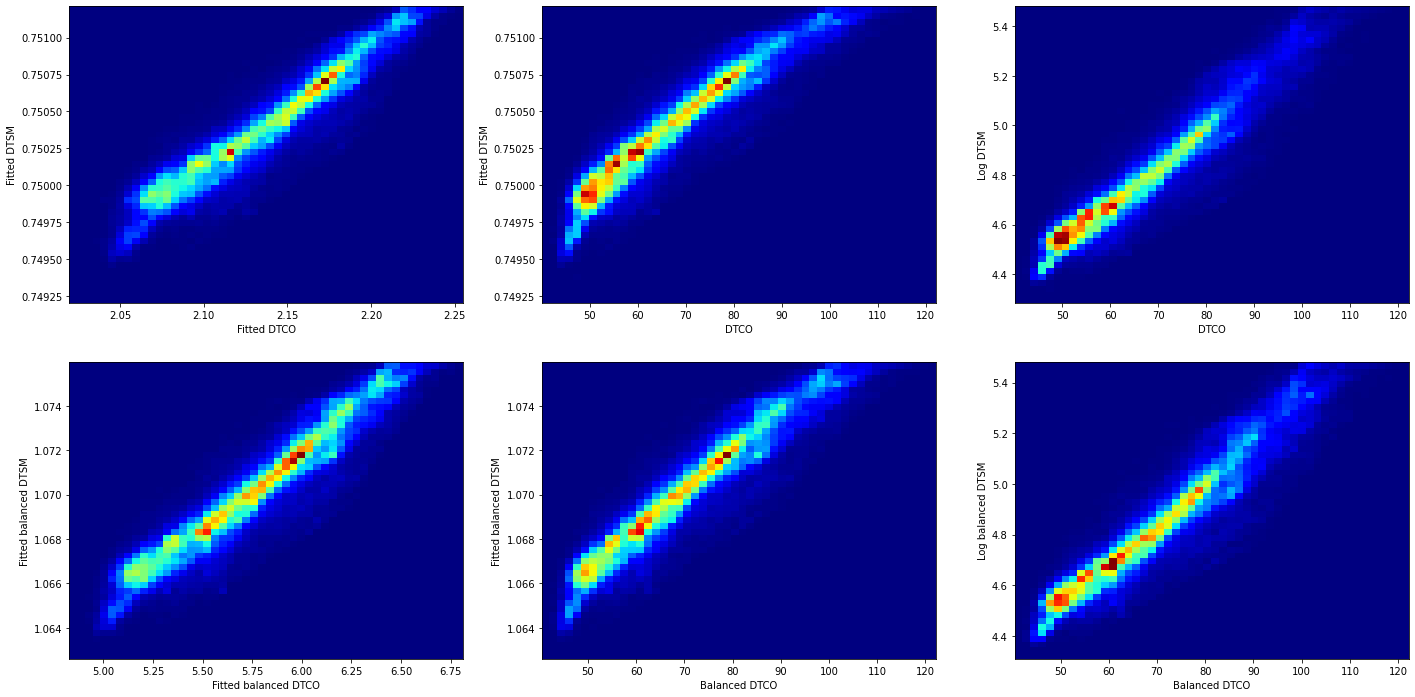

In [ ]:
f,(ax1,ax2) = plt.subplots(2,3, figsize=(24,12))

ax1[0].hist2d(x2,y2,bins=50, cmap='jet')
ax1[1].hist2d(x1,y2,bins=50, cmap='jet')
ax1[2].hist2d(x1,y3,bins=50, cmap='jet')

ax2[0].hist2d(xb2,yb2,bins=50, cmap='jet')
ax2[1].hist2d(xb1,yb2,bins=50, cmap='jet')
ax2[2].hist2d(xb1,yb3,bins=50, cmap='jet')
#plt.savefig("histogram_2d_04.png", bbox_inches='tight')

ax1[0].set_xlabel('Fitted DTCO')
ax1[0].set_ylabel('Fitted DTSM')
ax1[1].set_xlabel('DTCO')
ax1[1].set_ylabel('Fitted DTSM')
ax1[2].set_xlabel('DTCO')
ax1[2].set_ylabel('Log DTSM')

ax2[0].set_xlabel('Fitted balanced DTCO')
ax2[0].set_ylabel('Fitted balanced DTSM')
ax2[1].set_xlabel('Balanced DTCO')
ax2[1].set_ylabel('Fitted balanced DTSM')
ax2[2].set_xlabel('Balanced DTCO')
ax2[2].set_ylabel('Log balanced DTSM')